In [3]:
import pandas as pd
import numpy as np
import operator
import sys
#sys.path.insert(0, '/home/data4/jh/data/tools/customized/tadtools/tadtool_pkg')
import utils as ut
import itertools
import functools
import pickle
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
npc = pd.read_csv('NPC_tads.bed',sep='\t',header=None,names=['chrom','start','end'])
mesc = pd.read_csv('/home/data4/jh/data/projects/2020/aggregate/mESC/E14TG2a/Hi-C/tads/merge_TADs.bed',sep='\t',header=None,names=['chrom','start','end'])
oocyte = pd.read_csv('Oocyte_tads.bed',sep='\t',header=None,names=['chrom','start','end'])
pn3 = pd.read_csv('PN3_tads.bed',sep='\t',header=None,names=['chrom','start','end'])
sperm = pd.read_csv('Sperm_tads.bed',sep='\t',header=None,names=['chrom','start','end'])

In [6]:
tad_list = [mesc,npc,oocyte,sperm,pn3]
tad_pair = list(itertools.combinations(tad_list,2))
jis_list = list(map(lambda x: ut.compute_ji(x[0],x[1]),tad_pair))

In [18]:
max(enumerate(jis_list[6]),key=operator.itemgetter(1))

(401, 1.24998437519531e-05)

In [8]:
def set_intersect_len(set1,array):
    a, b = array
    intersect = set1.intersection(set(range(a, b)))
    intersect_len = len(intersect)
    return intersect_len
    
    
def compute_ji(tad1,tad2):
    jis = []
    for index, row in tad1.iterrows():
        tad1_tad = set(range(row[1],row[2]))
        tad2_chr = tad2.loc[tad2.chrom==row[0],['start','end']].to_numpy()
        intersect_lens = np.apply_along_axis(functools.partial(set_intersect_len,tad1_tad), 1, tad2_chr)
        if all(v == 0 for v in intersect_lens):
            jis.append(0)
        else:
            index, value = max(enumerate(intersect_lens), key=operator.itemgetter(1))
            union_len = len(tad1_tad.union(tad2_chr[index,:]))
            ji = value/union_len
            jis.append(ji)
    return jis 

In [ ]:
tad_list = [mesc,npc,oocyte,sperm,pn3]
tad_pair = list(itertools.combinations(tad_list,2))
jis_list = list(map(lambda x: compute_ji(x[0],x[1]),tad_pair))

In [4]:
with open('test.obj', 'rb') as file:
    ji_2 = pickle.load(file)

/home/data4/jh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "family" which is no longer supported as of 3.3 and will become an error two minor releases later
  This is separate from the ipykernel package so we can avoid doing imports until


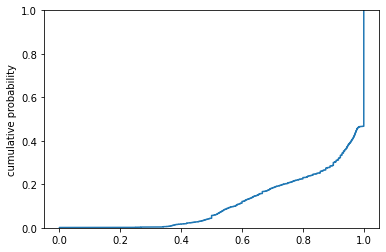

In [12]:
ax = sns.ecdfplot(ji_2)
ax.set(ylabel='cumulative probability')
plt.savefig('NPC_mESC.pdf',bbox_inches='tight',family='sans')

In [2]:
with open('jis_test.obj', 'rb') as file:
    jis = pickle.load(file)

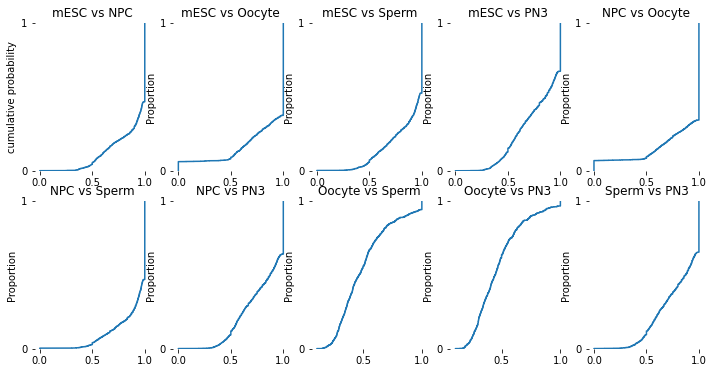

In [43]:
#f, axs = plt.subplots(2,5)
titles = ['mESC vs NPC','mESC vs Oocyte','mESC vs Sperm','mESC vs PN3','NPC vs Oocyte','NPC vs Sperm','NPC vs PN3','Oocyte vs Sperm','Oocyte vs PN3','Sperm vs PN3']
axs = []
plt.figure(figsize=(12,6))
for i in range(1,11):
    if i>1:
        axs.append(plt.subplot(2,5,i,frameon=False,ylabel='',yticks=[0,1],title=titles[i-1]))
    else:
        axs.append(plt.subplot(2,5,i,frameon=False,ylabel='cumulative probability',yticks=[0,1],title=titles[i-1]))
    sns.ecdfplot(jis[i-1],ax=axs[i-1])
plt.savefig('JIS.pdf')

In [2]:
with open('./cluster6/mesc_0.obj', 'rb') as file:
    a11 = pickle.load(file)
with open('./cluster6/mesc_1.obj', 'rb') as file:
    a12 = pickle.load(file)
with open('./cluster6/mesc_2.obj', 'rb') as file:
    a22= pickle.load(file)
with open('./cluster6//mesc_3.obj', 'rb') as file:
    s11 = pickle.load(file)
with open('./cluster6/mesc_4.obj', 'rb') as file:
    s12 = pickle.load(file)
with open('./cluster6/mesc_5.obj', 'rb') as file:
    s22 = pickle.load(file)

# with open('mesc_6.obj', 'rb') as file:
#     sa = pickle.load(file)
jis = [a11,a12,a22,s11,s12,s22]   

In [26]:
#from scipy.integrate import simps
import statistics
area = map(statistics.median, a11)
print("area A11 =", list(area))
area = map(statistics.median, a12)
print("area A12 =", list(area))
area = map(statistics.median, a22)
print("area A22 =", list(area))
area = map(statistics.median, s11)
print("area S11 =", list(area))
area = map(statistics.median, s12)
print("area S12 =", list(area))
area = map(statistics.median, s22)
print("area S22 =", list(area))

area A11 = [0.9999937500390622, 0.9999954545661156, 0.9999854168836773, 0.916664756948423]
area A12 = [0.9999944444753085, 0.9999954545661156, 0.999990000099999, 0.8888864197599451]
area A22 = [0.9999944444753085, 0.9999954545661156, 0.9999933036164697, 0.8819418426967449]
area S11 = [0.9999966517969746, 0.9999937500390622, 0.9807404957408632, 0.8118677571187338]
area S12 = [0.9999961538609466, 0.9999950000249999, 0.9729723155592462, 0.79240713893007]
area S22 = [0.9999895834461793, 0.971427877551516, 0.9666660625004195, 0.7911818376072238]


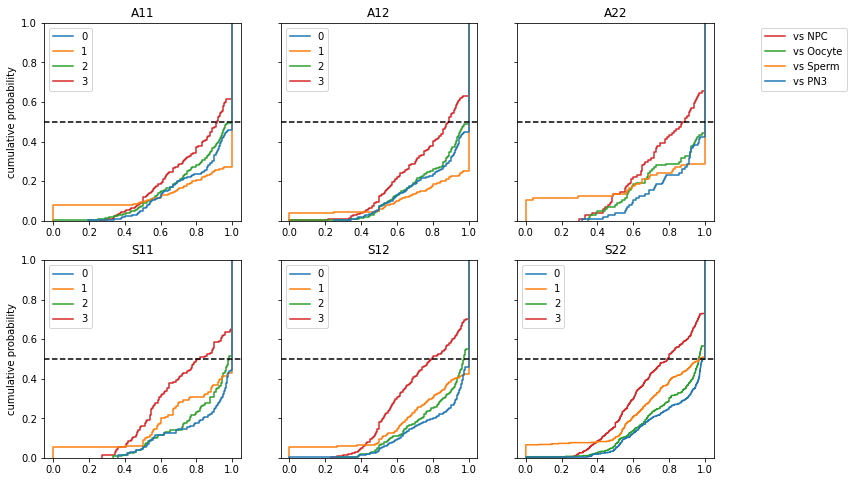

In [24]:
titles = ['A11','A12','A22','S11','S12','S22']
#axs = []
#plt.figure(figsize=(12,4))
f, (ax1,ax2) = plt.subplots(2,3, sharey=True,figsize=(12,8))
sns.ecdfplot(jis[0],ax=ax1[0])
sns.ecdfplot(jis[1],ax=ax1[1])
sns.ecdfplot(jis[2],ax=ax1[2])
sns.ecdfplot(jis[3],ax=ax2[0])
sns.ecdfplot(jis[4],ax=ax2[1])
sns.ecdfplot(jis[5],ax=ax2[2])
# def median_line(ax):
#     ax.axhline(0.5)
# np.apply_along_axis(median_line,0, ax1)
ax1[0].axhline(0.5, ls='--', color='black')
ax1[1].axhline(0.5, ls='--', color='black')
ax1[2].axhline(0.5, ls='--', color='black')
ax2[0].axhline(0.5, ls='--', color='black')
ax2[1].axhline(0.5, ls='--', color='black')
ax2[2].axhline(0.5, ls='--', color='black')
ax1[0].set_ylabel('cumulative probability')
ax1[0].set_title('A11')
ax1[1].set_title('A12')
ax1[2].set_title('A22')
ax2[0].set_ylabel('cumulative probability')
ax2[0].set_title('S11')
ax2[1].set_title('S12')
ax2[2].set_title('S22')
# ax1.get_legend().remove()
# ax2.get_legend().remove()
#ax3.get_legend().remove()
ax1[2].legend(['vs NPC','vs Oocyte','vs Sperm','vs PN3'],bbox_to_anchor=(1.7, 1),loc='upper right')
plt.savefig('JIS_cluster_6.pdf',bbox_inches='tight')

In [16]:
a11_npc == s12

True